In [1]:
import pandas as pd
import numpy as np

In [2]:
url="https://raw.githubusercontent.com/Fluid-AI/marketprophecy/main/BTC%20USD/BTC-USD%20Training%20Data%20-%201st%20Jan%202016%20to%201st%20Jan%202022.csv"
df=pd.read_csv(url)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
1,2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2,2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
3,2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
4,2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600


In [3]:
url2="https://raw.githubusercontent.com/Fluid-AI/marketprophecy/main/BTC%20USD/BTC-USD%20Out%20of%20Time%20Testing%201st%20Jan%202022%20to%204th%20Feb%202022.csv"
df2=pd.read_csv(url2)
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,47686.812500,24582667004
1,2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,47345.218750,27951569547
2,2022-01-03,47343.542969,47510.726563,45835.964844,46458.117188,46458.117188,33071628362
3,2022-01-04,46458.851563,47406.546875,45752.464844,45897.574219,45897.574219,42494677905
4,2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,43569.003906,36851084859


In [4]:
df.shape

(2193, 7)

In [5]:
df2.shape

(35, 7)

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

In [7]:
df.set_index('Date',inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600


In [8]:
df2.set_index('Date',inplace=True)
df2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,47686.812500,24582667004
2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,47345.218750,27951569547
2022-01-03,47343.542969,47510.726563,45835.964844,46458.117188,46458.117188,33071628362
2022-01-04,46458.851563,47406.546875,45752.464844,45897.574219,45897.574219,42494677905
2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,43569.003906,36851084859


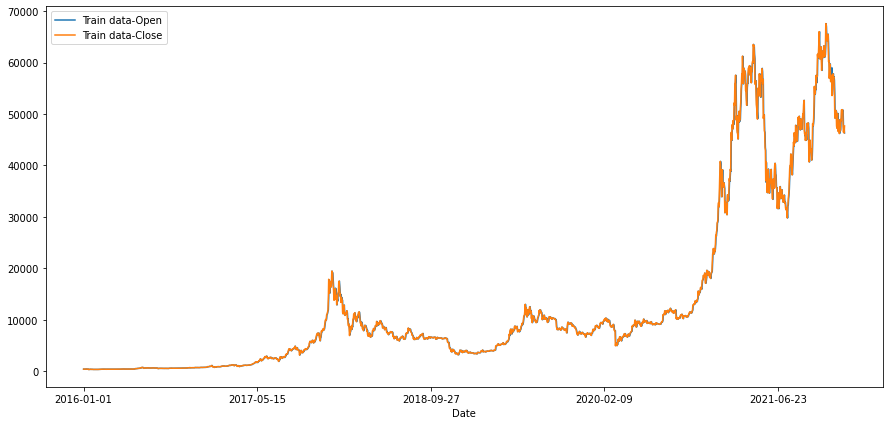

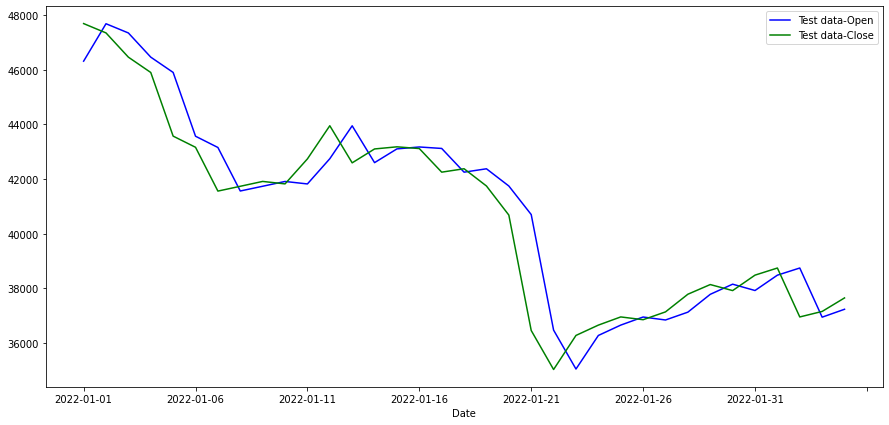

In [9]:
axis=df['Open'].plot(label='Train data-Open',figsize=(15,7))
df['Close'].plot(label='Train data-Close',ax=axis)
plt.legend()
plt.show()

axis2=df2['Open'].plot(label='Test data-Open',color='blue',figsize=(15,7))
df2['Close'].plot(label='Test data-Close',ax=axis2,color='green')
plt.legend()
plt.show()

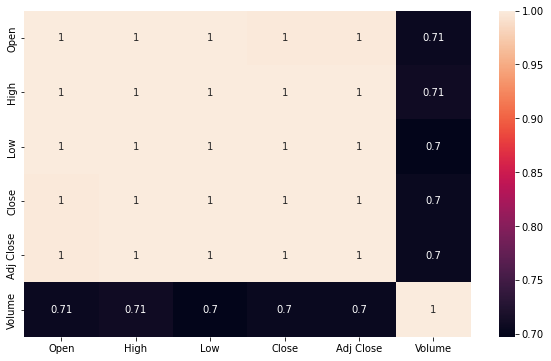

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [11]:
X=df.drop('Close',axis=1)
y=df['Close']

In [12]:
test_X=df2.drop('Close',axis=1)

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [14]:
models={'DecisionTreeRegressor':DecisionTreeRegressor(),
       'KNeighborsRegressor':KNeighborsRegressor(),
       'RandomForestRegressor':RandomForestRegressor(),
       'GradientBoostingRegressor':GradientBoostingRegressor(),
       'XGBRegressor':XGBRegressor()}

In [17]:
from sklearn import metrics

In [18]:
score_card=pd.DataFrame(columns=['Model Name','Train RMSE','Test RMSE'])

def update_score_card(model_name,model):
    global X,test_X,y,score_card
    model.fit(X,y)
    ypred_train=model.predict(X)
    ypred_test=model.predict(test_X)
    score_card=score_card.append({'Model Name':model_name,
                                  'Train RMSE':metrics.mean_squared_error(y,ypred_train,squared=False),
                                  'Test RMSE':metrics.mean_squared_error(df2['Close'],ypred_test,squared=False)},ignore_index=True)
    print('Updated Report of Model',model_name,'\n')

In [19]:
for model_name, model in zip(models.keys(),models.values()):
    update_score_card(model_name,model)

Updated Report of Model DecisionTreeRegressor 

Updated Report of Model KNeighborsRegressor 

Updated Report of Model RandomForestRegressor 

Updated Report of Model GradientBoostingRegressor 

Updated Report of Model XGBRegressor 



In [20]:
score_card

,Model Name,Train RMSE,Test RMSE
0,DecisionTreeRegressor,0.000000,137.623382
1,KNeighborsRegressor,9319.315413,23526.583312
2,RandomForestRegressor,30.677958,159.228688
3,GradientBoostingRegressor,74.201808,180.770876
4,XGBRegressor,20.940797,303.172310


In [46]:
rfr=RandomForestRegressor()
rfr.fit(X,y)

RandomForestRegressor()

In [47]:
ypred=rfr.predict(test_X)

In [48]:
df2['predicted close RF']=ypred

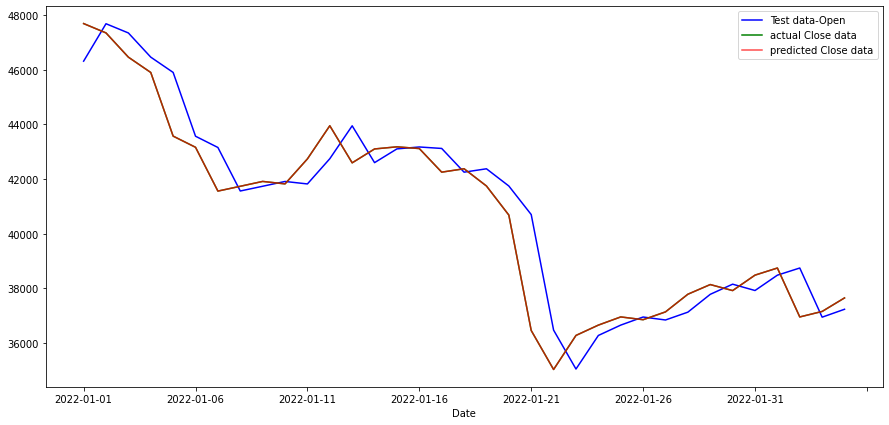

In [49]:
axis2=df2['Open'].plot(label='Test data-Open',color='blue',figsize=(15,7))
df2['Close'].plot(label='actual Close data',ax=axis2,color='green')
df2['Close'].plot(label='predicted Close data',ax=axis2,color='red',alpha=0.7)
plt.legend()
plt.show()

In [50]:
print(metrics.mean_squared_error(df2['Close'],df2['predicted close RF'],squared=False))

146.33392074402025


In [ ]:
#Random Forest algorithm is giving the best performance for this data